In [12]:
import sklearn
from sklearn import model_selection
from sklearn import datasets
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
# 生成数据
x, y = datasets.make_moons(n_samples = 1000, 
                                   noise = 0.25,
                                   random_state = 100)
train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, 
                                                    test_size = 0.2,
                                                    random_state = 42)

In [55]:
# 查看神经网络层数对正确率的影响
layers = []
val_loss = []
val_acc = []
for n in range(10):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(8, activation = 'relu'))
    for i in range(n):
        model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', 
                 metrics = ['acc'])
    history = model.fit(train_x, train_y, epochs = 500,
                       validation_data = (test_x, test_y))
    layers.append(n)
    val_loss.append(history.history['val_loss'][-1])
    val_acc.append(history.history['val_acc'][-1])

Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - 0s 529us/sample - loss: 0.7339 - acc: 0.3088 - val_loss: 0.7130 - val_acc: 0.3350
Epoch 2/500
800/800 [==============================] - 0s 59us/sample - loss: 0.6893 - acc: 0.4913 - val_loss: 0.6747 - val_acc: 0.6200
Epoch 3/500
800/800 [==============================] - 0s 39us/sample - loss: 0.6487 - acc: 0.7075 - val_loss: 0.6413 - val_acc: 0.6900
Epoch 4/500
800/800 [==============================] - 0s 67us/sample - loss: 0.6133 - acc: 0.7350 - val_loss: 0.6110 - val_acc: 0.7150
Epoch 5/500
800/800 [==============================] - 0s 39us/sample - loss: 0.5817 - acc: 0.7575 - val_loss: 0.5846 - val_acc: 0.7150
Epoch 6/500
800/800 [==============================] - 0s 67us/sample - loss: 0.5541 - acc: 0.7700 - val_loss: 0.5620 - val_acc: 0.7250
Epoch 7/500
800/800 [==============================] - 0s 39us/sample - loss: 0.5293 - acc: 0.7725 - val_loss: 0.5416 - val_acc: 0.7450
E

In [56]:
print(layers)
print(val_loss)
print(val_acc)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.31863902017474177, 0.13886048763990402, 0.14635049613192677, 0.22231422886252403, 0.1405758927203715, 0.41733995391696227, 0.2634011677466333, 0.6664878585794941, 0.4515612382510517, 0.23243804432451726]
[0.835, 0.935, 0.93, 0.95, 0.95, 0.92, 0.905, 0.91, 0.92, 0.925]


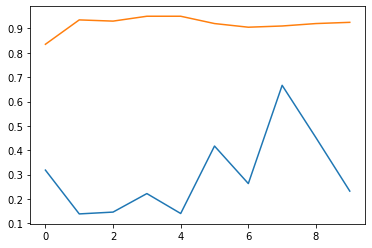

In [57]:
plt.plot(layers, val_loss)
plt.plot(layers, val_acc)

Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - 1s 1ms/sample - loss: 0.6545 - acc: 0.7925 - val_loss: 0.5876 - val_acc: 0.8300
Epoch 2/500
800/800 [==============================] - 0s 59us/sample - loss: 0.4617 - acc: 0.8575 - val_loss: 0.3873 - val_acc: 0.8150
Epoch 3/500
800/800 [==============================] - 0s 47us/sample - loss: 0.3166 - acc: 0.8675 - val_loss: 0.3520 - val_acc: 0.8300
Epoch 4/500
800/800 [==============================] - 0s 59us/sample - loss: 0.2823 - acc: 0.8788 - val_loss: 0.3201 - val_acc: 0.8400
Epoch 5/500
800/800 [==============================] - 0s 47us/sample - loss: 0.2641 - acc: 0.8825 - val_loss: 0.3051 - val_acc: 0.8350
Epoch 6/500
800/800 [==============================] - 0s 59us/sample - loss: 0.2557 - acc: 0.8925 - val_loss: 0.3317 - val_acc: 0.8500
Epoch 7/500
800/800 [==============================] - 0s 67us/sample - loss: 0.2368 - acc: 0.9112 - val_loss: 0.2617 - val_acc: 0.8750
Epo

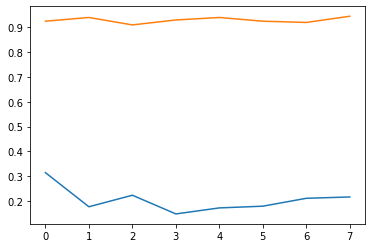

In [58]:
# 查看drop_out层的层数对正确率的影响
layers = []
val_loss = []
val_acc = []
for n in range(8):
    counter = 0
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(8, activation = 'relu'))
    for i in range(6):
        model.add(tf.keras.layers.Dense(32, activation = 'relu'))
        if counter < n:
            counter += 1
            model.add(tf.keras.layers.Dropout(rate = 0.5))
    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', 
                 metrics = ['acc'])
    history = model.fit(train_x, train_y, epochs = 500,
                       validation_data = (test_x, test_y))
    layers.append(n)
    val_loss.append(history.history['val_loss'][-1])
    val_acc.append(history.history['val_acc'][-1])

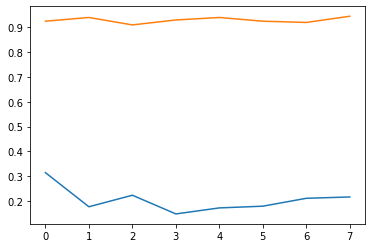

In [60]:
plt.plot(layers, val_loss)
plt.plot(layers, val_acc)

In [61]:
# 查看正则化超参数对正确率的影响
def build_model_with_regularization(_lambda):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(8, activation = 'relu'))
    model.add(tf.keras.layers.Dense(32, activation = 'relu',
                                   kernel_regularizer = tf.keras.regularizers.l2(_lambda)))
    model.add(tf.keras.layers.Dense(32, activation = 'relu', 
                                   kernel_regularizer = tf.keras.regularizers.l2(_lambda)))
    model.add(tf.keras.layers.Dense(32, activation = 'relu',
                                   kernel_regularizer = tf.keras.regularizers.l2(_lambda)))
    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
    return model

In [62]:
lambda_value = []
val_loss = []
val_acc = []
for _lambda in [1e-5, 1e-3, 1e-1, 0.12, 0.13]:
    model = build_model_with_regularization(_lambda)
    history = model.fit(train_x, train_y, epochs = 500, validation_data = (test_x, test_y))
    lambda_value.append(_lambda)
    val_loss.append(history.history['val_loss'][-1])
    val_acc.append(history.history['val_acc'][-1])

Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - 1s 944us/sample - loss: 0.6586 - acc: 0.6363 - val_loss: 0.6139 - val_acc: 0.7150
Epoch 2/500
800/800 [==============================] - 0s 59us/sample - loss: 0.5498 - acc: 0.7500 - val_loss: 0.4981 - val_acc: 0.7700
Epoch 3/500
800/800 [==============================] - 0s 67us/sample - loss: 0.4333 - acc: 0.8075 - val_loss: 0.4034 - val_acc: 0.8100
Epoch 4/500
800/800 [==============================] - 0s 59us/sample - loss: 0.3573 - acc: 0.8487 - val_loss: 0.3457 - val_acc: 0.8500
Epoch 5/500
800/800 [==============================] - 0s 47us/sample - loss: 0.3096 - acc: 0.8662 - val_loss: 0.3305 - val_acc: 0.8450
Epoch 6/500
800/800 [==============================] - 0s 39us/sample - loss: 0.2892 - acc: 0.8662 - val_loss: 0.3083 - val_acc: 0.8600
Epoch 7/500
800/800 [==============================] - 0s 47us/sample - loss: 0.2725 - acc: 0.8825 - val_loss: 0.2994 - val_acc: 0.8450
E

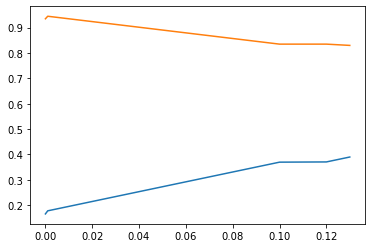

In [64]:
plt.plot(lambda_value, val_loss)
plt.plot(lambda_value, val_acc)